## **Capstone MDS - Regresión Lineal**

#### **_Integrantes:_**  

1. Evans Díaz   
1. Felipe Ojeda
1. Javier Cofre  
1. Luis Reinoso

In [123]:
# importar librerías
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,  Lasso, LassoCV, lasso_path
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from matplotlib.ticker import EngFormatter
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [51]:
# función regresión lineal
def regresion_lineal(X_train, X_test, y_train, y_test):
    
    lm_lr = LinearRegression()
    lm_lr.fit(X_train, y_train)
    y_pred_test = lm_lr.predict(X_test)
    print('R2_test: ', r2_score(y_test, y_pred_test))
    print('MSE_test: ', mean_squared_error(y_test, y_pred_test))
    print('RMSE_test: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

    y_pred_train = lm_lr.predict(X_train)
    print('R2_train: ', r2_score(y_train, y_pred_train))
    print('MSE_train: ', mean_squared_error(y_train, y_pred_train))
    print('RMSE_train: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))
    
    return lm_lr

In [52]:
# función summary de regresión lineal
def summary_regresion_lineal(X_train, y_train):
    
    X_train = sm.add_constant(X_train)
    lm_sm = sm.OLS(y_train, X_train).fit()
    print(lm_sm.summary())
    
    return lm_sm

## **_1. Lectura (carga) de los Datos_**

In [53]:
# importamos archivo
#df = pd.read_csv('../Data/df_final_pay_des_sin_mt.csv')

# importamos archivo desde github (ojo que la rama se llama master)
df = pd.read_csv('https://raw.githubusercontent.com/ecdiazl/capstone-project/master/Data/df_final_pay_des_sin_mt.csv')

In [54]:
# miramos el dataframe
df.head()

,crew_E2,crew_E3,crew_E4,day_10,day_11,day_12,day_13,day_14,day_15,day_16,...,CAT 798-AC_des,KOM-CHQ_des,KOM.960E5_des,Kom.930E-4_des,Kom.930E-4SE_des,Kom.930EN_des,Kom.930ER_des,Kom.930ER-MT_des,Kom.980E5_des,Komatsu AHS_des
0,False,False,True,False,False,False,False,False,False,False,...,-0.21334,-0.575556,2.735792,0.191462,0.563663,2.277691,0.101727,-0.035749,-2.98167,-0.101592
1,True,False,False,False,False,False,False,False,False,False,...,-0.21334,-0.575556,2.735792,0.191462,0.607062,2.277691,0.101727,-0.035749,-2.98167,-0.101592
2,False,False,True,False,False,False,False,False,False,False,...,-0.21334,-0.575556,2.735792,0.191462,0.520264,2.277691,0.101727,-0.035749,-2.98167,-0.101592
3,True,False,False,False,False,False,False,False,False,False,...,-0.21334,-0.575556,2.735792,-1.756724,0.607062,2.277691,0.101727,-0.035749,-2.98167,-0.101592
4,False,False,True,False,False,False,False,False,False,False,...,-0.21334,-0.575556,2.735792,0.191462,0.563663,2.277691,0.101727,-0.035749,-2.98167,-0.101592


In [55]:
# información general df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   crew_E2              1565 non-null   bool   
 1   crew_E3              1565 non-null   bool   
 2   crew_E4              1565 non-null   bool   
 3   day_10               1565 non-null   bool   
 4   day_11               1565 non-null   bool   
 5   day_12               1565 non-null   bool   
 6   day_13               1565 non-null   bool   
 7   day_14               1565 non-null   bool   
 8   day_15               1565 non-null   bool   
 9   day_16               1565 non-null   bool   
 10  day_17               1565 non-null   bool   
 11  day_18               1565 non-null   bool   
 12  day_19               1565 non-null   bool   
 13  day_2                1565 non-null   bool   
 14  day_20               1565 non-null   bool   
 15  day_21               1565 non-null   b

## **_2 Preparación del DataFrame_**

In [56]:
# transformamos las variables bool a categorical y le asignamos 0 o 1
for col in df.columns:
  if df[col].dtype == 'bool':
     df[col] = df[col].astype('category').cat.codes
     df[col] = df[col].astype('category') # para que quede como category y no como int8

In [57]:
print('Nombre Columnas: ',df.columns)
print('Cantidad Columnas: ',len(df.columns))

Nombre Columnas:  Index(['crew_E2', 'crew_E3', 'crew_E4', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_2',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_3', 'day_30', 'day_31', 'day_4',
       'day_5', 'day_6', 'day_7', 'day_8', 'day_9', 'distance',
       'distance_down', 'distance_down_level', 'distance_up',
       'distance_up_level', 'lift_down', 'lift_down_level', 'lift_up',
       'lift_up_level', 'month_10', 'month_11', 'month_12', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'pay_original', 'shift_B', 'travel_time', 'year_2023',
       'year_2024', 'total_des', 'efectivo_des', 'mantencion_des',
       'mecanica_des', 'electrica_des', 'mant_excl_des', 'mec_excl_des',
       'elec_excl_des', 'som_excl_des', 'demora_des', 'r_prog_des',
       'r_noprg_des', 'waiting_des', 'queued_des', '

## **_3 Regresión Lineal Inicial_**

In [58]:
# definimos el tamaño del set de test
test_size = 0.25

# separamos los datos en X e y
X = df.drop('pay_original', axis=1)
y = df['pay_original']

# dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) 

In [59]:
# aplicamos la función de regresión lineal
lm_rl = regresion_lineal(X_train, X_test, y_train, y_test)

R2_test:  0.636214954883749
MSE_test:  144947898.61729136
RMSE_test:  12039.430992255879
R2_train:  0.6906969165524366
MSE_train:  121506671.77893719
RMSE_train:  11023.006476408204


In [60]:
# sumario del modelo
ro=summary_regresion_lineal(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:           pay_original   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     30.07
Date:                Sat, 13 Jul 2024   Prob (F-statistic):          4.18e-226
Time:                        11:02:26   Log-Likelihood:                -12572.
No. Observations:                1173   AIC:                         2.531e+04
Df Residuals:                    1089   BIC:                         2.574e+04
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.53e+05   5

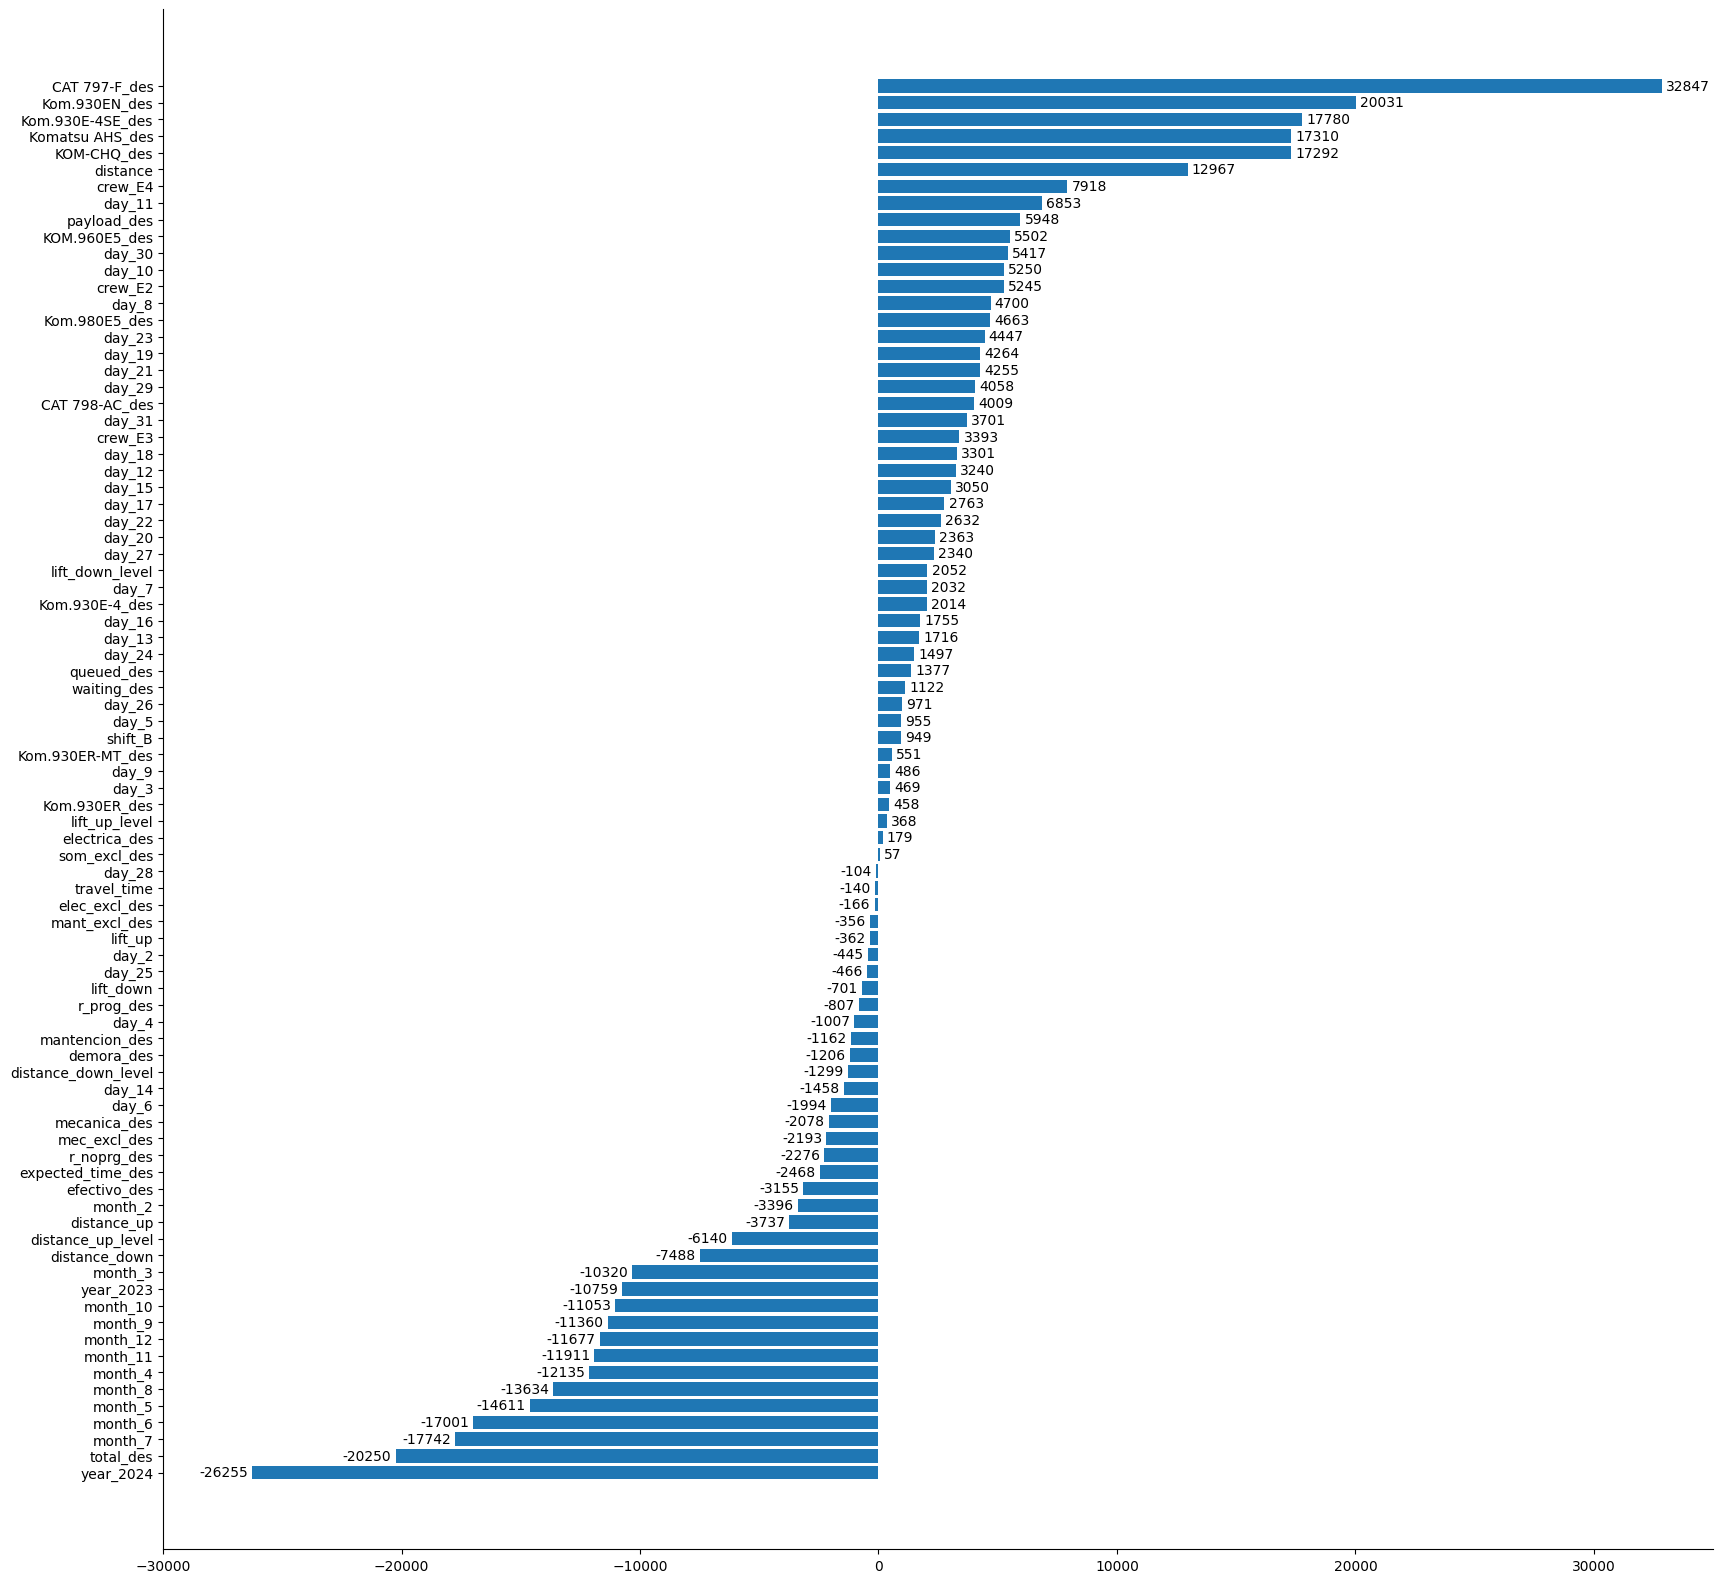

In [61]:
df_coef_rl = pd.DataFrame(ro.params).reset_index()
df_coef_rl = df_coef_rl.rename(columns={'index':'features', 0:'importance'})
df_coef_rl = df_coef_rl.iloc[1:].copy()

# Filtrar para mantener solo las características con coeficientes no nulos
feature_importance = df_coef_rl[df_coef_rl['importance'] != 0]

# Ordenar las características por importancia
feature_importance = feature_importance.sort_values(by='importance', ascending=True)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(20, 20))
bars = plt.barh(feature_importance['features'], feature_importance['importance'])
#plt.xlabel('Importancia')
#plt.ylabel('Características')
sns.despine()

# Agregamos limites al eje x
plt.xlim(-30000, 35000)

# Agregar los valores de cada barra
for bar in bars:
    if bar.get_width() > 0:
        plt.annotate(f'{bar.get_width():.0f}', 
                     xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),  # Desplazamiento del texto
                     textcoords='offset points',
                     ha='left', va='center')
    else:
        plt.annotate(f'{bar.get_width():.0f}', 
                     xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                     xytext=(-3, 0),  # Desplazamiento del texto
                     textcoords='offset points',
                     ha='right', va='center')
plt.show()

## _4 Optimización del Modelo (I)_ 

### _4.1 Selección de Variables_

#### _4.1.1 Utilizando Lasso_

In [62]:
# buscamos alpha optimo con LassoCV
alpha_values = np.linspace(0.01, 300, 30000)

# Crea un objeto LassoCV
lasso_cv = LassoCV(alphas=alpha_values, cv=5)

# Ajusta el modelo a los datos de entrenamiento
lasso_cv.fit(X_train, y_train)

# Valor óptimo de alpha
best_alpha = lasso_cv.alpha_

# Evalúa el modelo en el conjunto de prueba
score = lasso_cv.score(X_test, y_test)

print(f"Mejor valor de alpha: {best_alpha}")
print(f"Puntuación en el conjunto de prueba: {score}")

/opt/homebrew/Caskroom/miniconda/base/envs/py312/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47534672.55088806, tolerance: 37218350.25021226
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/Caskroom/miniconda/base/envs/py312/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64571656.95875549, tolerance: 37218350.25021226
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/Caskroom/miniconda/base/envs/py312/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80457274.81803894, tolerance: 37218350.25021226
  model = cd_fast.enet_coordinate_des

Mejor valor de alpha: 73.72000000000001
Puntuación en el conjunto de prueba: 0.6647350055978797


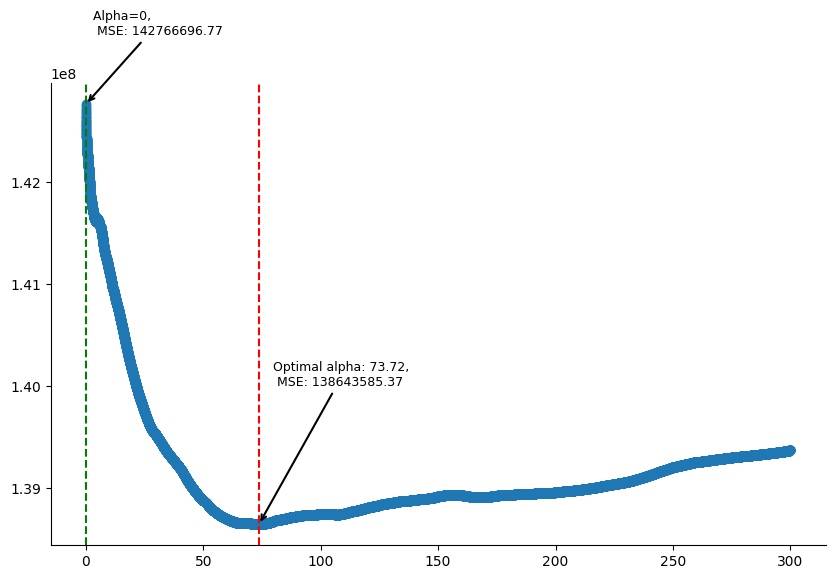

In [63]:
# Graficar MSE vs. Alpha
plt.figure(figsize=(10,6))
plt.plot(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), '-o')
#plt.xlabel('Alpha')
#plt.ylabel('Mean MSE across CV folds')
#plt.title('Path de Regularización')
plt.axvline(lasso_cv.alpha_, color='red', linestyle='--')
plt.axvline(lasso_cv.alphas_[29999], color='green', linestyle='--')
sns.despine()

# Anotar el valor óptimo de alpha en el gráfico
plt.annotate(f'Optimal alpha: {lasso_cv.alpha_:.2f}, \n MSE: {np.min(np.mean(lasso_cv.mse_path_, axis=1)):.2f}',
             xy=(lasso_cv.alpha_, np.min(np.mean(lasso_cv.mse_path_, axis=1))),
             xycoords='data', xytext=(10,100), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", lw=1.5),
             fontsize=9)
# Anotar el valor para alpha=0
plt.annotate(f'Alpha=0, \n MSE: {np.max(np.mean(lasso_cv.mse_path_[29999])):.2f}',
             xy=(0, np.mean(lasso_cv.mse_path_[29999])),
             xycoords='data', xytext=(5,50), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", lw=1.5),
             fontsize=9)

plt.show()

In [64]:
# Aplicar Lasso para la selección de características
lasso = Lasso(alpha=lasso_cv.alpha_)  
lasso.fit(X_train, y_train)

# Seleccionar las características que tienen coeficientes no nulos
selected_features = X_train.columns[lasso.coef_ != 0]

print("Características seleccionadas:")
print(selected_features)


Características seleccionadas:
Index(['crew_E2', 'crew_E3', 'crew_E4', 'day_10', 'day_11', 'day_14', 'day_2',
       'day_21', 'day_23', 'day_25', 'day_30', 'day_4', 'day_6', 'day_8',
       'distance', 'distance_down_level', 'distance_up_level', 'lift_down',
       'lift_up', 'month_3', 'month_6', 'month_7', 'month_8', 'month_9',
       'shift_B', 'year_2024', 'total_des', 'mantencion_des', 'electrica_des',
       'mant_excl_des', 'mec_excl_des', 'elec_excl_des', 'som_excl_des',
       'demora_des', 'r_prog_des', 'r_noprg_des', 'waiting_des', 'queued_des',
       'payload_des', 'expected_time_des', 'CAT 797-F_des', 'CAT 798-AC_des',
       'KOM-CHQ_des', 'KOM.960E5_des', 'Kom.930E-4_des', 'Kom.930E-4SE_des',
       'Kom.930ER_des', 'Kom.930ER-MT_des', 'Komatsu AHS_des'],
      dtype='object')


In [65]:
len(selected_features)

49

> Volvemos ajustar el modelo con las variables seleccionadas

In [66]:
# separamos los datos en train y test
X_lasso= df[selected_features]
y_lasso = df['pay_original']

# dividimos los datos en train y test
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size=test_size, random_state=42)

In [67]:
# aplicamos la función de regresión lineal
lm_lasso = regresion_lineal(X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso)

R2_test:  0.6537013724568359
MSE_test:  137980543.81370544
RMSE_test:  11746.511984998162
R2_train:  0.6869330951249435
MSE_train:  122985251.97842124
RMSE_train:  11089.871594316195


In [68]:
# sumario del modelo
ls = summary_regresion_lineal(X_train_lasso, y_train_lasso)

                            OLS Regression Results                            
Dep. Variable:           pay_original   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     50.29
Date:                Sat, 13 Jul 2024   Prob (F-statistic):          5.07e-246
Time:                        11:02:37   Log-Likelihood:                -12589.
No. Observations:                1173   AIC:                         2.528e+04
Df Residuals:                    1123   BIC:                         2.553e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.392e+05    

In [69]:
test_predictions = lm_lasso.predict(X_test_lasso)
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test_lasso}).sort_index()
test_results

,Test Predictions,Actuals
15,169565.630246,179563.313849
23,163292.507739,175253.907957
29,175635.196973,174081.848964
30,157129.729007,154207.599007
32,150468.660288,128529.373027
...,...,...
1551,131139.832566,140439.223881
1552,128366.604526,129308.830067
1554,128013.156244,116144.915930
1555,120952.754573,128094.791048


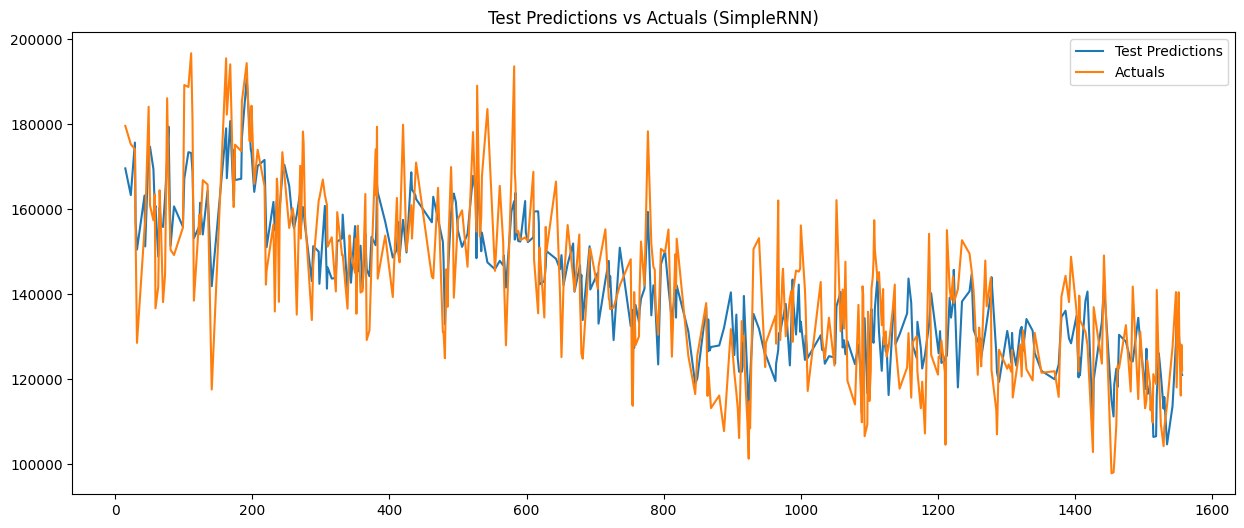

In [70]:
plt.figure(figsize=(15,6))
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])

plt.title('Test Predictions vs Actuals (SimpleRNN)')
plt.legend(['Test Predictions', 'Actuals'])
plt.show()

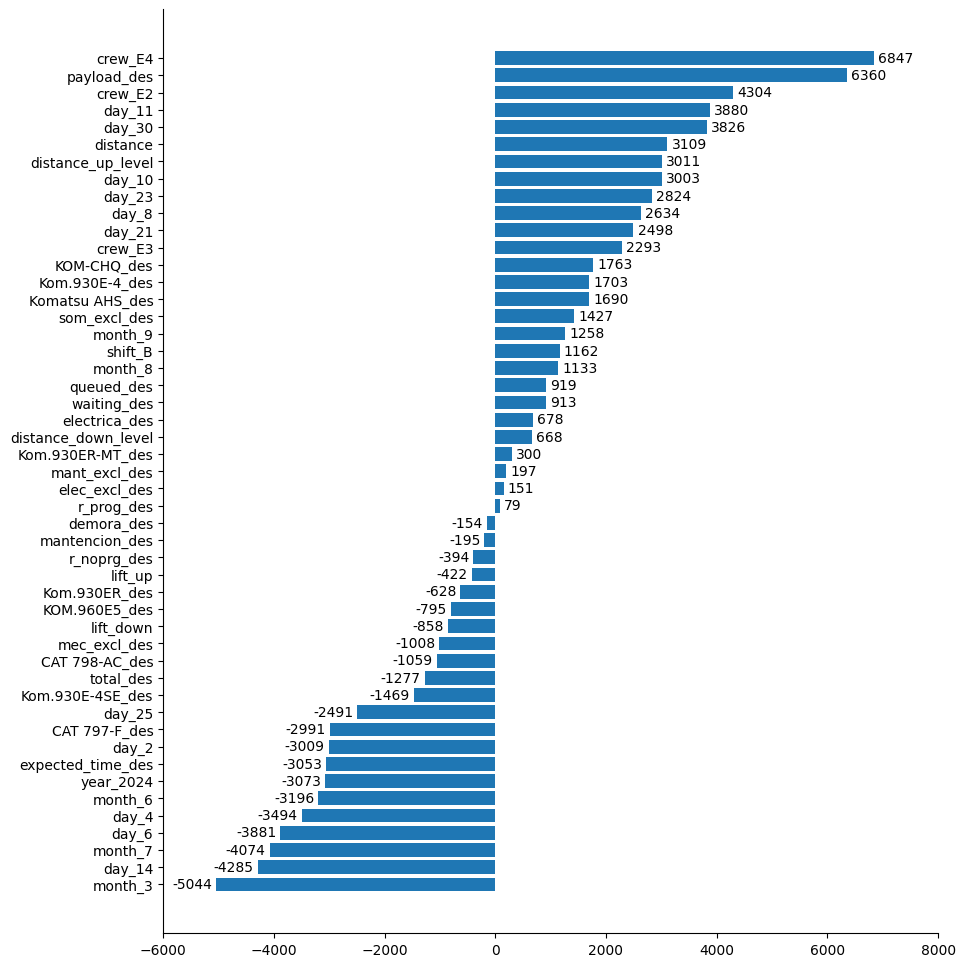

In [71]:
df_coef_ls = pd.DataFrame(ls.params).reset_index()
df_coef_ls = df_coef_ls.rename(columns={'index':'features', 0:'importance'})
df_coef_ls = df_coef_ls.iloc[1:].copy()

# Filtrar para mantener solo las características con coeficientes no nulos
feature_importance = df_coef_ls[df_coef_ls['importance'] != 0]

# Ordenar las características por importancia
feature_importance = feature_importance.sort_values(by='importance', ascending=True)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 12))
bars = plt.barh(feature_importance['features'], feature_importance['importance'])
#plt.xlabel('Importancia')
#plt.ylabel('Características')
sns.despine()
# Agregamos limites al eje x
plt.xlim(-6000, 8000)

# Agregar los valores de cada barra
for bar in bars:
    if bar.get_width() > 0:
        plt.annotate(f'{bar.get_width():.0f}', 
                     xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),  # Desplazamiento del texto
                     textcoords='offset points',
                     ha='left', va='center')
    else:
        plt.annotate(f'{bar.get_width():.0f}', 
                     xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                     xytext=(-3, 0),  # Desplazamiento del texto
                     textcoords='offset points',
                     ha='right', va='center')
plt.show()

### _4.2 Residuos_

#### _4.2.1 En Conjunto Entrenamiento_

> Nos quedamos con la selección de variables obtenidas en Lasso.

In [72]:
# separamos los datos en X e y para las variables seleccionadas
X = df[X_train_lasso.columns]
y = df['pay_original']

# separamos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [73]:
# iniciamos el modelo
lr = LinearRegression()

# ajustamos el modelo
lr.fit(X_train, y_train)

LinearRegression()

In [74]:
# predicción conjunto entrenamiento y residuales
y_pred_train = lr.predict(X_train)
residual_train = y_train - y_pred_train

# ordenamos los datos
residual_train_order = residual_train.sort_index()
X_train_order = X_train.sort_index()

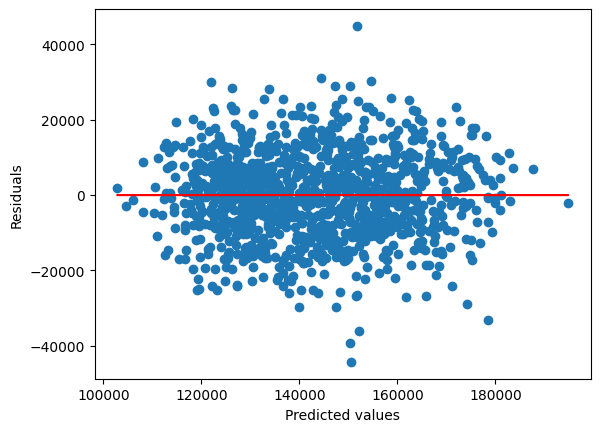

In [75]:
# graficamos los residuales
plt.scatter(y_pred_train, residual_train)
plt.ylabel('Residuals')
plt.xlabel('Predicted values')

# graficamos la linea de tendencia
coefficients = np.polyfit(y_pred_train, residual_train, 1)
line = np.polyval(coefficients, y_pred_train)
plt.plot(y_pred_train, line, color='red', label='Tendencia cuadrática')

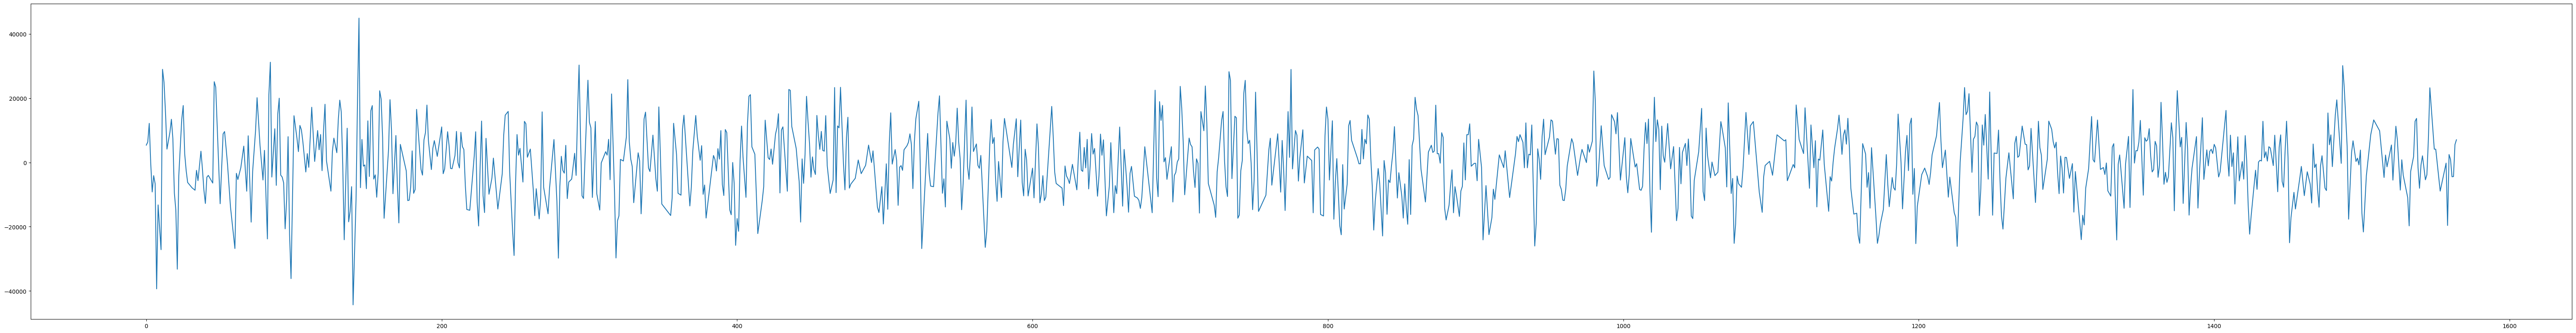

In [76]:
# grafaica de los residuos vs el tiempo 
plt.figure(figsize=(80,10))
plt.plot(X_train_order.index, residual_train_order)

plt.show()

#### _4.2.2 En Conjunto Test_

In [77]:
# predicción conjunto entrenamiento y residuales
y_pred_test = lr.predict(X_test)
residual_test = y_test - y_pred_test

# ordenamos los datos
residual_test_order = residual_test.sort_index()
X_test_order = X_test.sort_index()

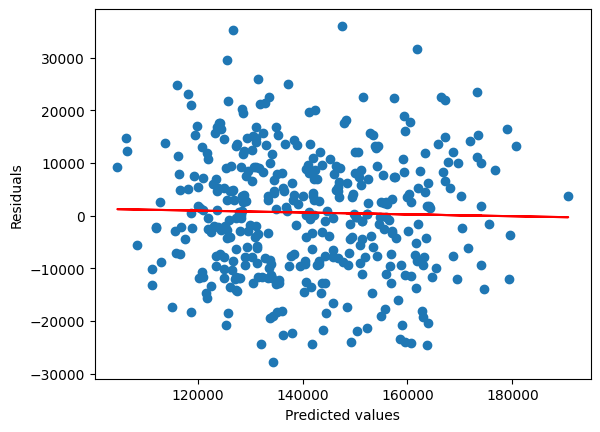

In [78]:
# gráfica de los residuos
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals)
plt.ylabel('Residuals')
plt.xlabel('Predicted values')

# graficamos la linea de tendencia
coefficients = np.polyfit(y_pred_test, residuals, 1)
line = np.polyval(coefficients, y_pred_test)
plt.plot(y_pred_test, line, color='red', label='Tendencia cuadrática')


In [79]:
# ordenamos los residuos por indice de menor a mayor
residual_order = residuals.sort_index()
X_order = X_test.sort_index()

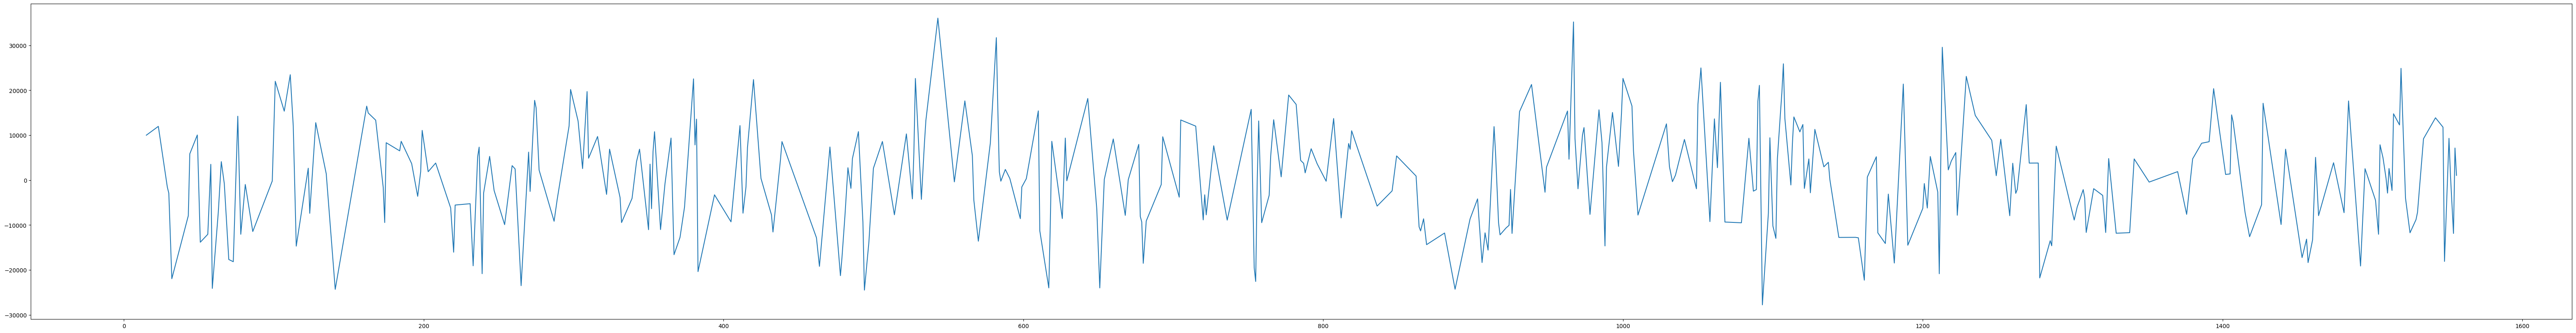

In [80]:
# grafaica de los residuos vs el tiempo 
plt.figure(figsize=(80,10))
plt.plot(X_order.index, residual_order)

### _4.3 Heteroscedasticidad - Logaritmo Variable Objetivo_

> Quitamos un 'material_tonnage' que es 0 (revisar después del despeje de los outliers)

In [81]:
# separamos los datos en train y test
X = df[X_train_lasso.columns]
y = np.log(df['pay_original'])

# separamos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [82]:
# aplicamos la función de regresión lineal
lm_log = regresion_lineal(X_train, X_test, y_train, y_test)

R2_test:  0.6474627699257894
MSE_test:  0.006980717827839345
RMSE_test:  0.08355069016973675
R2_train:  0.6763475336589322
MSE_train:  0.006289927383415204
RMSE_train:  0.07930906242930377


In [83]:
# calculamos el valor inverso de la transformación logaritmica para RMSE y MSE
RMSE = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(lm_log.predict(X_test))))
MSE = mean_squared_error(np.exp(y_test), np.exp(lm_log.predict(X_test)))
RMSE, MSE

(np.float64(11665.0428735283), np.float64(136073225.24125338))

In [84]:
# sumario del modelo
summary_regresion_lineal(X_train, y_train)

                            OLS Regression Results                            
Dep. Variable:           pay_original   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     47.89
Date:                Sat, 13 Jul 2024   Prob (F-statistic):          4.53e-238
Time:                        11:02:38   Log-Likelihood:                 1308.4
No. Observations:                1173   AIC:                            -2517.
Df Residuals:                    1123   BIC:                            -2264.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.8367    

## _5 Optimización del Modelo (II)_ 

In [85]:
# generamos un nuevo dataframe con las variables seleccionadas
df_int = pd.concat([df[X_train_lasso.columns],df['pay_original']], axis=1).copy()
df_int

,crew_E2,crew_E3,crew_E4,day_10,day_11,day_14,day_2,day_21,day_23,day_25,...,CAT 797-F_des,CAT 798-AC_des,KOM-CHQ_des,KOM.960E5_des,Kom.930E-4_des,Kom.930E-4SE_des,Kom.930ER_des,Kom.930ER-MT_des,Komatsu AHS_des,pay_original
0,0,0,1,0,0,0,1,0,0,0,...,-3.246214,-0.213340,-0.575556,2.735792,0.191462,0.563663,0.101727,-0.035749,-0.101592,182896.714123
1,1,0,0,0,0,0,1,0,0,0,...,-3.246214,-0.213340,-0.575556,2.735792,0.191462,0.607062,0.101727,-0.035749,-0.101592,177821.821993
2,0,0,1,0,0,0,0,0,0,0,...,-3.246214,-0.213340,-0.575556,2.735792,0.191462,0.520264,0.101727,-0.035749,-0.101592,184522.752091
3,1,0,0,0,0,0,0,0,0,0,...,-3.246214,-0.213340,-0.575556,2.735792,-1.756724,0.607062,0.101727,-0.035749,-0.101592,169636.141007
4,0,0,1,0,0,0,0,0,0,0,...,-3.246214,-0.213340,-0.575556,2.735792,0.191462,0.563663,0.101727,-0.035749,-0.101592,160945.398989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,1,0,0,0,0,0,0,0,0,0,...,0.371250,4.999982,-0.575556,-0.505479,0.191462,1.127852,0.101727,-0.035749,-1.147779,120091.925007
1561,0,1,0,0,0,0,0,0,0,0,...,0.371250,4.999982,-0.575556,-0.505479,0.191462,1.084453,0.101727,-0.035749,-1.147779,115654.846977
1562,0,0,0,0,0,0,0,0,0,0,...,0.341104,4.999982,-0.575556,-0.505479,0.191462,1.127852,0.101727,-0.035749,-1.147779,110101.874020
1563,0,1,0,0,0,0,0,0,0,0,...,0.371250,4.999982,-0.575556,-0.505479,0.191462,1.084453,-9.913288,-0.035749,-1.147779,129817.423976


### _5.1 Interacción 'payload_des' por 'distance'_

In [86]:
# creamos la nueva variable
df_int['pay_des_distance'] = df_int['payload_des'] * df_int['distance']
df_int['pay_des_distance']

0      -0.312552
1      -1.469275
2      -0.471309
3       0.405261
4      -0.515845
          ...   
1560   -2.552693
1561   -0.543630
1562   -0.194002
1563   -0.610907
1564   -0.312312
Name: pay_des_distance, Length: 1565, dtype: float64

In [87]:
# separamos los datos en X e y
X_int1 = df_int.drop('pay_original', axis=1)
y_int1 = df_int['pay_original']

# dividimos los datos en train y test
X_train_int1, X_test_int1, y_train_int1, y_test_int1 = train_test_split(X_int1, y_int1, test_size=test_size, random_state=42)

In [88]:
# aplicamos la función de regresión lineal
lm_int1 = regresion_lineal(X_train_int1, X_test_int1, y_train_int1, y_test_int1)

R2_test:  0.6524837365515346
MSE_test:  138465703.30039623
RMSE_test:  11767.145078581985
R2_train:  0.6901917908110569
MSE_train:  121705105.45434971
RMSE_train:  11032.003691730242


In [89]:
# sumario del modelo
summary_regresion_lineal(X_train_int1, y_train_int1)

                            OLS Regression Results                            
Dep. Variable:           pay_original   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sat, 13 Jul 2024   Prob (F-statistic):          1.14e-247
Time:                        11:02:38   Log-Likelihood:                -12583.
No. Observations:                1173   AIC:                         2.527e+04
Df Residuals:                    1122   BIC:                         2.553e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.39e+05    

### _5.2 Interacción 'payload_des' por 'expected_time_des'_

In [90]:
# creamos la nueva variable
df_int['pay_des_exp_time_des'] = df_int['payload_des'] * df_int['expected_time_des']
df_int['pay_des_exp_time_des']

0      -1.902709
1      -1.917618
2      -1.575582
3      -1.031939
4      -1.126762
          ...   
1560   -2.856933
1561   -0.860897
1562   -1.512901
1563   -1.246200
1564   -1.097086
Name: pay_des_exp_time_des, Length: 1565, dtype: float64

In [91]:
# separamos los datos en X e y
X_int2 = df_int.drop('pay_original', axis=1)
y_int2 = df_int['pay_original']

# dividimos los datos en train y test
X_train_int2, X_test_int2, y_train_int2, y_test_int2 = train_test_split(X_int2, y_int2, test_size=test_size, random_state=42)

In [92]:
# aplicamos la función de regresión lineal
lm_int2 = regresion_lineal(X_train_int2, X_test_int2, y_train_int2, y_test_int2)

R2_test:  0.6535285257388634
MSE_test:  138049413.51818985
RMSE_test:  11749.443115236987
R2_train:  0.6902841630914642
MSE_train:  121668817.91323686
RMSE_train:  11030.358920417633


In [93]:
# sumario del modelo
summary_regresion_lineal(X_train_int2, y_train_int2)

                            OLS Regression Results                            
Dep. Variable:           pay_original   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     48.99
Date:                Sat, 13 Jul 2024   Prob (F-statistic):          6.90e-247
Time:                        11:02:38   Log-Likelihood:                -12583.
No. Observations:                1173   AIC:                         2.527e+04
Df Residuals:                    1121   BIC:                         2.553e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.389e+05 

### _5.3 Interacción 'payload_des' por 'CAT 797-F_des'_

In [94]:
# creamos la nueva variable
df_int['pay_des_CAT_des'] = df_int['payload_des'] * df_int['CAT 797-F_des']
df_int['pay_des_CAT_des']

0      -8.745422
1      -7.826964
2      -6.603167
3      -5.776552
4      -6.868022
          ...   
1560   -0.666374
1561   -0.313054
1562   -0.381083
1563   -0.497416
1564   -0.600856
Name: pay_des_CAT_des, Length: 1565, dtype: float64

In [95]:
# separamos los datos en X e y
X_int3 = df_int.drop('pay_original', axis=1)
y_int3 = df_int['pay_original']

# dividimos los datos en train y test
X_train_int3, X_test_int3, y_train_int3, y_test_int3 = train_test_split(X_int3, y_int3, test_size=test_size, random_state=42)

In [96]:
# aplicamos la función de regresión lineal
lm_int3 = regresion_lineal(X_train_int3, X_test_int3, y_train_int3, y_test_int3)

R2_test:  0.6534071750530532
MSE_test:  138097764.94753003
RMSE_test:  11751.500540251445
R2_train:  0.6903926686050734
MSE_train:  121626192.59026444
RMSE_train:  11028.426569110592


In [97]:
# sumario del modelo
summary_regresion_lineal(X_train_int3, y_train_int3)

                            OLS Regression Results                            
Dep. Variable:           pay_original   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     48.03
Date:                Sat, 13 Jul 2024   Prob (F-statistic):          4.01e-246
Time:                        11:02:38   Log-Likelihood:                -12583.
No. Observations:                1173   AIC:                         2.527e+04
Df Residuals:                    1120   BIC:                         2.554e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.391e+05 

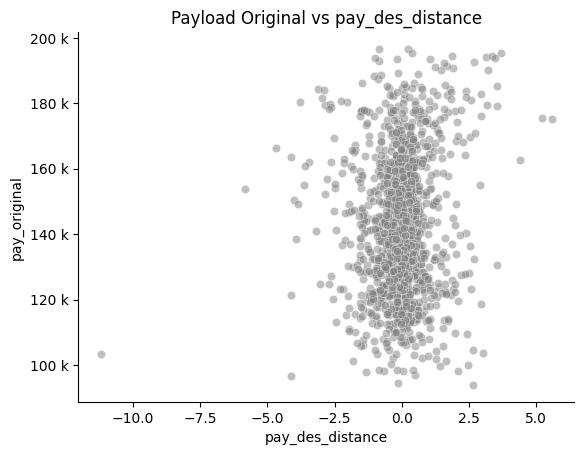

In [98]:
# graficamos 'payload_original' vs 'lift_down'
sns.scatterplot(x='pay_des_distance', y='pay_original', data=df_int, alpha=0.5, color='gray')

sns.despine()
plt.title('Payload Original vs pay_des_distance') 
plt.gca().yaxis.set_major_formatter(EngFormatter())
plt.show()

In [107]:
stargazer = Stargazer([ro, ls])

In [124]:
stargazer.title('Modelos de Regresión Lineal')
stargazer.custom_columns(['Regresión Lineal', 'Regresión Lasso'], [1, 1])
stargazer.show_model_numbers(False)
stargazer.show_degrees_of_freedom(False)
stargazer

In [125]:
HTML(stargazer.render_html())

In [132]:
open('https://raw.githubusercontent.com/ecdiazl/capstone-project/master/Data/regression.tex', 'w').write(stargazer.render_latex())  # for latex

FileNotFoundError: [Errno 2] No such file or directory: 'https://raw.githubusercontent.com/ecdiazl/capstone-project/master/Data/regression.tex'